In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import datetime as dt
from datetime import datetime, timedelta
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

#xf_ave=xf.groupby('time.minute').mean() #this doesn't create a minute average, but a minute climatology
#this code creates the average for each minute using all the data for that minute, 
#so it is centered at 30 seconds for each minute
#i check this #print(xf.Temperature_1[30:60].mean())  #xf_avg.Temperature_1[1].data
#xf_avg = xf.resample(time='1min',skipna=True).mean()
#print(xf_avg)
#talked to dave peacock averaging is :54 to 1:06 for each 1 minute average
#so need to take data and set to flag values for 07 to 53 seconds for each minute of data then
#then do resample so that the only valid data included in the average is :54 to 1:06

adir0='F:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/'
adir='F:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/sbe_temperature_logger_data/'
filename_all_nc='F:/data/cruise_data/saildrone/baja-2018/saildrone-gen_4-baja_2018-EP-sd1002-ALL-1_min-v1.nc'
filename_all_data_netcdf = adir0 + 'temperature_logger_all.nc'
filename_1min_data_netcdf = adir0 + 'temperature_logger_1min.nc'
#filename_1min_data_netcdf = 'F:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/' + 'temperature_logger_1min.nc'
filename_loggers_out_nc='f:/data/cruise_data/saildrone/baja-2018/saildrone-gen_4-baja_2018-EP-sd1002-ALL-1_min-v1_with_loggers.nc'

In [2]:
filename_1 = adir + 'SBE05608196_1_top/SBE05608196_2018-06-21.csv'
filename_2 = adir + 'SBE05604705_2/SBE05604705_2018-06-22.csv'
filename_3 = adir + 'SBE05605200_3/SBE05605200_2018-06-21.csv'
filename_4 = adir + 'SBE05608476_4_bottom/SBE05608476_2018-06-21.csv'
df = pd.read_csv(filename_1,header=11) #, sheet_name='data')
#increment time by 6 seconds so that minute average ois from 0-12seconds rather than -6 to +6 seconds around zeros
offset = pd.to_timedelta(6, unit='s') 
df['time']=pd.to_datetime(df['Date'] + ' ' + df['Time'])+offset
del df['Date']
del df['Time']
df.index=df['time']
xf1=df.to_xarray()
xf=df.to_xarray()
xf=xf.rename({'Temperature':'sea_water_temperature_1'})

df = pd.read_csv(filename_2,header=11) #, sheet_name='data')
offset = pd.to_timedelta(6, unit='s') 
df['time']=pd.to_datetime(df['Date'] + ' ' + df['Time'])+offset
del df['Date']
del df['Time']
df.index=df['time']
xf2=df.to_xarray()

df = pd.read_csv(filename_3,header=11) #, sheet_name='data')
offset = pd.to_timedelta(6, unit='s') 
df['time']=pd.to_datetime(df['Date'] + ' ' + df['Time'])+offset
del df['Date']
del df['Time']
df.index=df['time']
xf3=df.to_xarray()

df = pd.read_csv(filename_4,header=11) #, sheet_name='data')
offset = pd.to_timedelta(6, unit='s') 
df['time']=pd.to_datetime(df['Date'] + ' ' + df['Time'])+offset
del df['Date']
del df['Time']
df.index=df['time']
xf4=df.to_xarray()

#print(xf.dims)  3233981
#print(xf2.dims)  3270126
#print(xf3.dims)  3234945
#print(xf4.dims)  3236717

ilen=len(xf.time)
xf['sea_water_temperature_2']=xf2.Temperature[0:3233981]
xf['sea_water_temperature_3']=xf3.Temperature[0:3233981]
xf['sea_water_temperature_4']=xf4.Temperature[0:3233981]

In [3]:
#check that times all the same intervals and ends
print(xf1.time[3233980].data)
print(xf2.time[3233980].data)
print(xf3.time[3233980].data)
print(xf4.time[3233980].data)


2018-06-21T20:39:25.000000000
2018-06-21T20:39:25.000000000
2018-06-21T20:39:25.000000000
2018-06-21T20:39:25.000000000


In [4]:
attrs = {'long_name': 'sea surface depth temperature at 0.295 m','coordinates': 'time',
        'standard_name': 'Seawater temperature', 'installed_height':'-0.295 m' ,
         'serial_number' : 'SBE05608196', 'model_number': '56', 
          'sensor_description': 'Seabird 56 Temperature Logger',
         'model_name': 'SBE 56', 'product_page':'http://www.seabird.com/sbe56-temperature-logger', 
          'nominal_sampling_schedule': '2 sec', 
         'units':'kelvin','valid_min':260.0,'valid_max':320.0}
xf.sea_water_temperature_1.attrs=attrs
attrs = {'long_name': 'sea surface depth temperature at 0.985 m','coordinates': 'time',
        'standard_name': 'Seawater temperature', 'installed_height':'-0.985 m' ,
         'serial_number' : 'SBE05604705', 'model_number': '56', 
          'sensor_description': 'Seabird 56 Temperature Logger',
         'model_name': 'SBE 56', 'product_page':'http://www.seabird.com/sbe56-temperature-logger', 
          'nominal_sampling_schedule': '2 sec', 
         'units':'kelvin','valid_min':260.0,'valid_max':320.0}
xf.sea_water_temperature_2.attrs=attrs
attrs = {'long_name': 'sea surface depth temperature at -1.420 m','coordinates': 'time',
        'standard_name': 'Seawater temperature', 'installed_height':'-1.420 m' ,
         'serial_number' : 'SBE05605200', 'model_number': '56', 
          'sensor_description': 'Seabird 56 Temperature Logger',
         'model_name': 'SBE 56', 'product_page':'http://www.seabird.com/sbe56-temperature-logger', 
          'nominal_sampling_schedule': '2 sec', 
         'units':'kelvin','valid_min':260.0,'valid_max':320.0}
xf.sea_water_temperature_3.attrs=attrs
attrs = {'long_name': 'sea surface depth temperature at -1.785 m','coordinates': 'time',
        'standard_name': 'Seawater temperature', 'installed_height':'-1.785 m' ,
         'serial_number' : 'SBE05608476', 'model_number': '56', 
          'sensor_description': 'Seabird 56 Temperature Logger',
         'model_name': 'SBE 56', 'product_page':'http://www.seabird.com/sbe56-temperature-logger', 
          'nominal_sampling_schedule': '2 sec', 
         'units':'kelvin','valid_min':260.0,'valid_max':320.0}
xf.sea_water_temperature_4.attrs=attrs



In [5]:
xf.sea_water_temperature_4

<xarray.DataArray 'sea_water_temperature_4' (time: 3233981)>
array([22.4026, 22.4025, 22.4026, ..., 23.7792, 23.7792, 23.7795])
Coordinates:
  * time     (time) datetime64[ns] 2018-04-08T00:00:06 2018-04-08T00:00:08 ...
Attributes:
    sensor_description:         Seabird 56 Temperature Logger
    model_name:                 SBE 56
    model_number:               56
    valid_min:                  260.0
    coordinates:                time
    standard_name:              Seawater temperature
    serial_number:              SBE05608476
    installed_height:           -1.785 m
    units:                      kelvin
    nominal_sampling_schedule:  2 sec
    valid_max:                  320.0
    product_page:               http://www.seabird.com/sbe56-temperature-logger
    long_name:                  sea surface depth temperature at -1.785 m

In [6]:
xf.sea_water_temperature_1

<xarray.DataArray 'sea_water_temperature_1' (time: 3233981)>
array([22.3957, 22.3957, 22.3955, ..., 23.4869, 23.487 , 23.4876])
Coordinates:
  * time     (time) datetime64[ns] 2018-04-08T00:00:06 2018-04-08T00:00:08 ...
Attributes:
    sensor_description:         Seabird 56 Temperature Logger
    model_name:                 SBE 56
    model_number:               56
    valid_min:                  260.0
    coordinates:                time
    standard_name:              Seawater temperature
    serial_number:              SBE05608196
    installed_height:           -0.295 m
    units:                      kelvin
    nominal_sampling_schedule:  2 sec
    valid_max:                  320.0
    product_page:               http://www.seabird.com/sbe56-temperature-logger
    long_name:                  sea surface depth temperature at 0.295 m

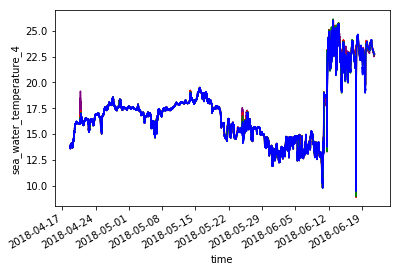

In [7]:
#start cruise, into water 160270
#end cruise, out 470900
i1=460000
i2=-10000
xf.sea_water_temperature_1[i1:i2].plot.line(color='purple')
xf.sea_water_temperature_2[i1:i2].plot.line(color='red')
xf.sea_water_temperature_3[i1:i2].plot.line(color='green')
xf.sea_water_temperature_4[i1:i2].plot.line(color='blue')
plt.show()

In [8]:
xftem=xf.sea_water_temperature_1
pt = pd.to_datetime(xf.time.data)
psec=pt.second
tem=xftem[(psec <=12)]  #data average should be only use sec 54 to sec 06 of each minute 
xf_avg1 = tem.resample(time='1min').mean()
xf_std1 = tem.resample(time='1min').std(ddof=1)
xf['sea_water_temperature_1_mean']=xf_avg1
xf['sea_water_temperature_1_std']=xf_std1


In [9]:
#xf_avg=xf_avg2
#xf_avg['sea_water_temperature_1_std']=xf_std2
#xf_avg['sea_water_temperature_1_mean']=xf_avg2


In [10]:
xftem=xf.sea_water_temperature_2
pt = pd.to_datetime(xf.time.data)
psec=pt.second
tem=xftem[(psec <=12)]  #data average should be only use sec 54 to sec 06 of each minute 
xf_avg2 = tem.resample(time='1min').mean()
xf_std2 = tem.resample(time='1min').std(ddof=1)
xf['sea_water_temperature_2_mean']=xf_avg2
xf['sea_water_temperature_2_std']=xf_std2
#xf_avg['sea_water_temperature_2_mean']=xf_avg2
#xf_avg['sea_water_temperature_2_std']=xf_std2

xftem=xf.sea_water_temperature_3
pt = pd.to_datetime(xf.time.data)
psec=pt.second
tem=xftem[(psec <=12)]  #data average should be only use sec 54 to sec 06 of each minute 
xf_avg3 = tem.resample(time='1min').mean()
xf_std3 = tem.resample(time='1min').std(ddof=1)
xf['sea_water_temperature_3_mean']=xf_avg3
xf['sea_water_temperature_3_std']=xf_std3
#xf_avg['sea_water_temperature_3_mean']=xf_avg3
#xf_avg['sea_water_temperature_3_std']=xf_std3

xftem=xf.sea_water_temperature_4
pt = pd.to_datetime(xf.time.data)
psec=pt.second
tem=xftem[(psec <=12)]  #data average should be only use sec 54 to sec 06 of each minute 
xf_avg4 = tem.resample(time='1min').mean()
xf_std4 = tem.resample(time='1min').std(ddof=1)
xf['sea_water_temperature_4_mean']=xf_avg4
xf['sea_water_temperature_4_std']=xf_std4
#xf_avg['sea_water_temperature_4_mean']=xf_avg4
#xf_avg['sea_water_temperature_4_std']=xf_std4

In [11]:
#xf_avg1
#xf2

In [12]:
ds3 = xf2
ds3['sea_water_temperature_1']=xf1.Temperature
ds3['sea_water_temperature_2']=xf2.Temperature
ds3['sea_water_temperature_3']=xf3.Temperature
ds3['sea_water_temperature_4']=xf4.Temperature
#   ....:                  'sea_water_temperature_1': (['time'], xf1),
#   ....:                  'sea_water_temperature_2': (['time'], xf2),
#   ....:                  'sea_water_temperature_3': (['time'], xf3),
#  ....:                  'sea_water_temperature_4': (['time'], xf4)},
#  ....:                 coords={'time': xf2.time[:]})
del ds3['Temperature']
ds3

<xarray.Dataset>
Dimensions:                  (time: 3270126)
Coordinates:
  * time                     (time) datetime64[ns] 2018-04-08T00:00:06 ...
Data variables:
    sea_water_temperature_1  (time) float64 22.4 22.4 22.4 22.4 22.4 22.4 ...
    sea_water_temperature_2  (time) float64 22.39 22.39 22.39 22.39 22.39 ...
    sea_water_temperature_3  (time) float64 22.35 22.35 22.35 22.35 22.35 ...
    sea_water_temperature_4  (time) float64 22.4 22.4 22.4 22.4 22.4 22.4 ...

In [13]:
ds3_1min = xr.Dataset({ 
                     'sea_water_temperature_1_mean': (['time'], xf_avg1),
                    'sea_water_temperature_1_std': (['time'], xf_std1),
                   'sea_water_temperature_2_mean': (['time'], xf_avg2),
                    'sea_water_temperature_2_std': (['time'], xf_std2),
                     'sea_water_temperature_3_mean': (['time'], xf_avg3),
                     'sea_water_temperature_3_std': (['time'], xf_std3),
                     'sea_water_temperature_4_mean': (['time'], xf_avg4),
                    'sea_water_temperature_4_std': (['time'], xf_std4)},
                    coords={'time': xf_avg1.time})
ds3_1min

<xarray.Dataset>
Dimensions:                       (time: 107800)
Coordinates:
  * time                          (time) datetime64[ns] 2018-04-08 ...
Data variables:
    sea_water_temperature_4_std   (time) float64 5e-05 0.0001134 0.0001676 ...
    sea_water_temperature_1_std   (time) float64 9.574e-05 5.345e-05 ...
    sea_water_temperature_1_mean  (time) float64 22.4 22.4 22.4 22.4 22.4 ...
    sea_water_temperature_3_mean  (time) float64 22.35 22.35 22.35 22.35 ...
    sea_water_temperature_2_mean  (time) float64 22.39 22.39 22.4 22.4 22.4 ...
    sea_water_temperature_3_std   (time) float64 0.0001291 0.0001464 ...
    sea_water_temperature_2_std   (time) float64 0.0001291 0.0001574 ...
    sea_water_temperature_4_mean  (time) float64 22.4 22.4 22.4 22.4 22.41 ...

In [14]:
attrs = {'long_name': 'sea surface depth temperature at 0.295 m','coordinates': 'time',
        'standard_name': 'Seawater temperature', 'installed_height':'-0.295 m' ,
         'serial_number' : 'SBE05608196', 'model_number': '56', 
          'sensor_description': 'Seabird 56 Temperature Logger',
         'model_name': 'SBE 56', 'product_page':'http://www.seabird.com/sbe56-temperature-logger', 
          'nominal_sampling_schedule': '1 minute averages from :54 to :06 seconds', 
         'units':'kelvin','valid_min':260.0,'valid_max':320.0}
xf.sea_water_temperature_1_mean.attrs=attrs
ds3_1min.sea_water_temperature_1_mean.attrs=attrs
#xf_avg.sea_water_temperature_1_mean.attrs=attrs
attrs['nominal_sampling_schedule']='1 minute std from :54 to :06 seconds'
xf.sea_water_temperature_1_std.attrs=attrs
ds3_1min.sea_water_temperature_1_std.attrs=attrs
#xf_avg.sea_water_temperature_1_std.attrs=attrs

attrs['nominal_sampling_schedule']='1 minute average from :54 to :06 seconds'
attrs['long_name']='sea surface depth temperature at 0.985 m'
attrs['installed_height']='-0.985 m'
attrs['serial_number']='SBE05604705'
xf.sea_water_temperature_2_mean.attrs=attrs
ds3_1min.sea_water_temperature_2_mean.attrs=attrs
#xf_avg.sea_water_temperature_2_mean.attrs=attrs
attrs['nominal_sampling_schedule']='1 minute std from :54 to :06 seconds'
xf.sea_water_temperature_2_std.attrs=attrs
ds3_1min.sea_water_temperature_2_std.attrs=attrs
#xf_avg.sea_water_temperature_2_std.attrs=attrs

attrs['nominal_sampling_schedule']='1 minute average from :54 to :06 seconds'
attrs['long_name']='sea surface depth temperature at 1.420 m'
attrs['installed_height']='-1.420 m'
attrs['serial_number']='SBE05605200'
xf.sea_water_temperature_3_mean.attrs=attrs
ds3_1min.sea_water_temperature_3_mean.attrs=attrs
#xf_avg.sea_water_temperature_3_mean.attrs=attrs
attrs['nominal_sampling_schedule']='1 minute std from :54 to :06 seconds'
xf.sea_water_temperature_3_std.attrs=attrs
ds3_1min.sea_water_temperature_3_std.attrs=attrs
#xf_avg.sea_water_temperature_3_std.attrs=attrs

attrs['nominal_sampling_schedule']='1 minute average from :54 to :06 seconds'
attrs['long_name']='sea surface depth temperature at 1.785 m'
attrs['installed_height']='-1.785 m'
attrs['serial_number']='SBE05608476'
xf.sea_water_temperature_4_mean.attrs=attrs
ds3_1min.sea_water_temperature_4_mean.attrs=attrs
#xf_avg.sea_water_temperature_4_mean.attrs=attrs
attrs['nominal_sampling_schedule']='1 minute std from :54 to :06 seconds'
xf.sea_water_temperature_4_std.attrs=attrs
ds3_1min.sea_water_temperature_4_std.attrs=attrs
#xf_avg.sea_water_temperature_4_std.attrs=attrs


In [15]:
#print(tem.time[0:15])
#print(tem.data[0:15])
#print(xf_avg[0])
#print(xf_avg2[0:2])
#print(xf_std2[0:2])

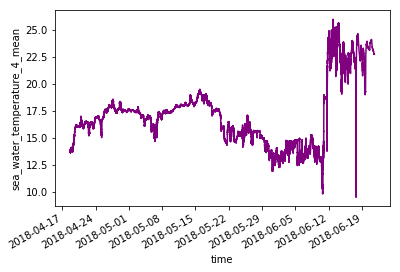

In [16]:
i1=460000
i2=-10000
xf.sea_water_temperature_4[i1:i2].plot.line(color='purple')
xf.sea_water_temperature_4_mean[i1:i2].plot.line(color='red')
#xf.sea_water_temperature_3[i1:i2].plot.line(color='green')
#xf.sea_water_temperature_4[i1:i2].plot.line(color='blue')
plt.show()

In [17]:
ds3.to_netcdf(filename_all_data_netcdf)
ds3_1min.to_netcdf(filename_1min_data_netcdf)

In [18]:
#dtest=xr.open_dataset(filename_1min_data_netcdf)

In [19]:
#combine with 1min average file
#filename_out_nc='F:/data/cruise_data/saildrone/baja-2018/saildrone-gen_4-baja_2018-EP-sd1002-ALL-1_min-v1.nc'
#dnew=xr.open_dataset(filename_1min_data_netcdf)
#dall=xr.open_dataset(filename_out_nc)

In [20]:
dataset=xr.open_dataset(filename_all_nc)
dataset.TIME[0:4]
ds3_1min=xr.open_dataset(filename_1min_data_netcdf)
ds3_1min.time[0]

<xarray.DataArray 'time' ()>
array('2018-04-08T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2018-04-08

In [21]:
#initialize data
#go to each 1 min average and match to data in saildrone data files
d1=np.ones((1,85592))*-999
d2=np.ones((1,85592))*-999
d3=np.ones((1,85592))*-999
d4=np.ones((1,85592))*-999
d1s=np.ones((1,85592))*-999
d2s=np.ones((1,85592))*-999
d3s=np.ones((1,85592))*-999
d4s=np.ones((1,85592))*-999
ilen=85592
for i in range(0,ilen):
    itemindex = np.where(ds3_1min.time==dataset.TIME.data[0,i])
    #print(itemindex,ds3_1min.sea_water_temperature_1_mean.data[itemindex])
    d1[0,i]=ds3_1min.sea_water_temperature_1_mean.data[itemindex]+273.15
    d2[0,i]=ds3_1min.sea_water_temperature_1_mean.data[itemindex]+273.15
    d3[0,i]=ds3_1min.sea_water_temperature_1_mean.data[itemindex]+273.15
    d4[0,i]=ds3_1min.sea_water_temperature_1_mean.data[itemindex]+273.15
    d1s[0,i]=ds3_1min.sea_water_temperature_1_std.data[itemindex]
    d2s[0,i]=ds3_1min.sea_water_temperature_1_std.data[itemindex]
    d3s[0,i]=ds3_1min.sea_water_temperature_1_std.data[itemindex]
    d4s[0,i]=ds3_1min.sea_water_temperature_1_std.data[itemindex]

In [22]:
dataset['sea_water_temperature_logger1_mean'] = (('trajectory', 'obs'), d1)
dataset['sea_water_temperature_logger2_mean'] = (('trajectory', 'obs'), d2)
dataset['sea_water_temperature_logger3_mean'] = (('trajectory', 'obs'), d3)
dataset['sea_water_temperature_logger4_mean'] = (('trajectory', 'obs'), d4)
dataset['sea_water_temperature_logger1_stddev'] = (('trajectory', 'obs'), d1s)
dataset['sea_water_temperature_logger2_stddev'] = (('trajectory', 'obs'), d2s)
dataset['sea_water_temperature_logger3_stddev'] = (('trajectory', 'obs'), d3s)
dataset['sea_water_temperature_logger4_stddev'] = (('trajectory', 'obs'), d4s)

In [23]:
attrs = {'long_name': 'sea surface depth temperature at 0.295 m','coordinates': 'time',
        'standard_name': 'Seawater temperature', 'installed_height':'-0.295 m' ,
         'serial_number' : 'SBE05608196', 'model_number': '56', 
          'sensor_description': 'Seabird 56 Temperature Logger',
         'model_name': 'SBE 56', 'product_page':'http://www.seabird.com/sbe56-temperature-logger', 
          'nominal_sampling_schedule': '1 minute averages from :54 to :06 seconds', 
         'units':'kelvin','valid_min':260.0,'valid_max':320.0}
dataset.sea_water_temperature_logger1_mean.attrs=attrs
attrs['nominal_sampling_schedule']='1 minute std from :54 to :06 seconds'
dataset.sea_water_temperature_logger1_stddev.attrs=attrs

attrs['nominal_sampling_schedule']='1 minute average from :54 to :06 seconds'
attrs['long_name']='sea surface depth temperature at 0.985 m'
attrs['installed_height']='-0.985 m'
attrs['serial_number']='SBE05604705'
dataset.sea_water_temperature_logger2_mean.attrs=attrs
attrs['nominal_sampling_schedule']='1 minute std from :54 to :06 seconds'
dataset.sea_water_temperature_logger2_stddev.attrs=attrs

attrs['nominal_sampling_schedule']='1 minute average from :54 to :06 seconds'
attrs['long_name']='sea surface depth temperature at 1.420 m'
attrs['installed_height']='-1.420 m'
attrs['serial_number']='SBE05605200'
dataset.sea_water_temperature_logger3_mean.attrs=attrs
attrs['nominal_sampling_schedule']='1 minute std from :54 to :06 seconds'
dataset.sea_water_temperature_logger3_stddev.attrs=attrs

attrs['nominal_sampling_schedule']='1 minute average from :54 to :06 seconds'
attrs['long_name']='sea surface depth temperature at 1.785 m'
attrs['installed_height']='-1.785 m'
attrs['serial_number']='SBE05608476'
dataset.sea_water_temperature_logger4_mean.attrs=attrs
attrs['nominal_sampling_schedule']='1 minute std from :54 to :06 seconds'
dataset.sea_water_temperature_logger4_stddev.attrs=attrs

dataset.to_netcdf(filename_loggers_out_nc)

<xarray.Dataset>
Dimensions:                               (obs: 85592, trajectory: 1)
Coordinates:
  * trajectory                            (trajectory) float32 1002.0
Dimensions without coordinates: obs
Data variables:
    LAT                                   (trajectory, obs) float64 ...
    TIME                                  (trajectory, obs) datetime64[ns] 2018-04-11T18:00:00 ...
    TEMP_O2_STDDEV                        (trajectory, obs) float64 ...
    CHLOR_MEAN                            (trajectory, obs) float64 ...
    RH_MEAN                               (trajectory, obs) float64 ...
    O2_CONC_STDDEV                        (trajectory, obs) float64 ...
    BARO_PRES_MEAN                        (trajectory, obs) float64 ...
    UWND_MEAN                             (trajectory, obs) float64 ...
    SAL_STDDEV                            (trajectory, obs) float64 ...
    TEMP_AIR_MEAN                         (trajectory, obs) float64 ...
    CDOM_MEAN                  

<xarray.Dataset>
Dimensions:           (obs: 85592, trajectory: 1)
Coordinates:
  * trajectory        (trajectory) float32 1002.0
Dimensions without coordinates: obs
Data variables:
    LAT               (trajectory, obs) float64 ...
    TIME              (trajectory, obs) datetime64[ns] ...
    TEMP_O2_STDDEV    (trajectory, obs) float64 ...
    CHLOR_MEAN        (trajectory, obs) float64 ...
    RH_MEAN           (trajectory, obs) float64 ...
    O2_CONC_STDDEV    (trajectory, obs) float64 ...
    BARO_PRES_MEAN    (trajectory, obs) float64 ...
    UWND_MEAN         (trajectory, obs) float64 ...
    SAL_STDDEV        (trajectory, obs) float64 ...
    TEMP_AIR_MEAN     (trajectory, obs) float64 ...
    CDOM_MEAN         (trajectory, obs) float64 ...
    SAL_MEAN          (trajectory, obs) float64 ...
    O2_SAT_MEAN       (trajectory, obs) float64 ...
    CHLOR_STDDEV      (trajectory, obs) float64 ...
    WWND_STDDEV       (trajectory, obs) float64 ...
    CDOM_STDDEV       (trajecto